**Coursebook: Classification**
- Part 3 of Introduction to Machine Learning in Python
- Course Length: 9 Hours
- Last Updated: September 2022

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team
___

# Background

The coursebook is part of the **Introduction to Machine Learning in Python** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

# Classification in Machine Learning

## Training Objectives

In this workshop, we'll extend our understanding of regression algorithms and see what we've learned in the previous workshop can be extended to solve a different kind of problems: classification problems. More specifically, we'll learn to solve binary and multi-class classification models using machine learning algorithms that are easily understood and in the case of logistic regression.

Also we'll learn to apply some of the most widely used machine learning algorithms today, such as decision tree, and random forest. We will also discover the tradeoff between model interpretability and performance.

We will learn to develop classification algorithms from scratch, and investigate the mathematical foundations underpinning logistic regressions, decision tree, and random forest. My objective is to deliver a 9-hour session that is packed with the depth to help you develop, apply, score and evaluate two of the most highly versatile algorithms widely used today.

- **Logistic Regression**
    - Understanding Odds  
    - Log of Odds  
    - Logistic Regression in Practice  
    - Assumption and Limitation
- **Model Evaluation**  
    - Cross Validation  
    - Bias variance trade-off  
    - Confusion matrix  
- **Decision Tree**
    - Interpretation
    - Entropy and Information Gain
    - Application of Decision Tree (Machine Learning Workflow)
- **Modeling Improvement Technique**
    - Evaluation Metrics
    - Sampling
    - Regularization
- **Ensemble-based Methods**
    - Random Forest

Before going into our main topic for this coursebook, let's import the packages we are going to use:

In [1]:
import pandas as pd
import numpy as np

## Logistic Regression
### Introduction

Despite being called a regression, logistic regression is a classification algorithm used to fit a regression curve, $y = f(x)$, where $y$ is a categorical variable. When $y$ is binary (1 for spam, 0 for not-spam) we also call the model **binomial logistic regression** where in cases of $y$ assuming more than 2 values you'll sometimes hear the model being referred to as a class of **multinomial logistic regression**.



## Theory

In logistic regression, a linear model (e.g., $\beta_0 + \beta_1x$) is included in a logistic (also called sigmoid) function ${1} \over {1 + e^-z}$, such that:

$ P(y_i = 1 | X) = \frac {1} {1 + e^\beta_0 + \beta_1x} $

where $ P(y_i = 1 | X) $ is the probabolity of the $i$th observation's target value, $y_i$, being class 1, $X$ is the data, $beta_0$ and $beta_1$ are the parameters to be learned, and $e$ is Eulers's number. The effecr of the logistic funstion is to constrain the calue of the function's ouput to between 0 and 1 so that it can be interpreted as a probability. If $ P(y_i = 1 | X) $ is gretaer than 0.5, predicted as class 1: otherwise, predicted as class 0.

### Classification Workflow

The example of classification is in Credit Risk Analysis, where machine learning is deployed to estimate probability of defaults (or in the measurement of other types of credit risk). The paper described how loan officers at bank use logistic regression "to identify characteristics that are indicative of people who are likely to default on loans, and then use those characteristics to discriminate between good and bad credit risks".

A quick summary of the findings:  
- Number of years at current employment and number of years at current address have negative coefficients, indicating that customers who have spent less time at either their current employer or their current address are more likely to default  
- Debt-to-income ratio (`dti`, a measurement we'll use in our project later) and amount of credit card debt both have positive coefficients, indicating that higher dti ratios or higher amounts of credit card debts are both associated with a greater likelihood of loan defaults.  

[Reichheld, F.F. (1996)., Learning from Customer Defections, in Harvard Business Review,march-april](https://hbr.org/1996/03/learning-from-customer-defections)
[Modelling Customer Retention with Statistical Techniques, Rough Data Models, and Genetic Programming.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.55.7177&rep=rep1&type=pdf)
[Modelling telecom customer attrition using logistic regression](https://academicjournals.org/article/article1379926496_Oghojafor%20et%20al.pdf)
[Credit Risk Analysis Using Logistic Regression Modeling](http://smartdrill.com/pdf/Credit%20Risk%20Analysis.pdf)

### Credit Risk Analysis / Modeling: Loans from Q4 2017

I've prepared the following data originally made available by [LendingClub](https://www.lendingclub). Some preprocessing steps have been applied to save you from the "data cleansing" work. We'll read the data into our workspace:

In [2]:
loan = pd.read_csv("data_input/loan2017q4.csv")
loan.head()

,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,w,debt_consolidation,14.08,675.99,156700.0,19.11,Source Verified,C,21936,3,0,MORTGAGE,0,11.962088,1,0
1,f,debt_consolidation,9.44,480.08,50000.0,19.35,Not Verified,B,5457,1,1,RENT,1,10.819778,0,1
2,w,debt_consolidation,28.72,1010.30,25000.0,65.58,Verified,F,23453,0,0,OWN,1,10.126631,1,0
3,w,debt_consolidation,13.59,484.19,175000.0,12.60,Not Verified,C,31740,0,0,MORTGAGE,1,12.072541,0,0
4,w,major_purchase,15.05,476.33,109992.0,10.00,Not Verified,C,2284,3,0,MORTGAGE,0,11.608163,0,0


The variable of interest is the `not_paid` variable, a binary variable that indicate whether a loan is fully paid or not. A loan is considered "not paid" (not paid = 1) when it is **Defaulted**, **Charged Off**, or past due date (**Grace Period**). To prevent one class from dominating the other, the data I've prepared here over-sampled more "bad" loans so that the underlying characteristics of the empirically minority class is adequately represented.  

In [3]:
loan.not_paid.value_counts()

1    778
0    778
Name: not_paid, dtype: int64

What's important to note is that logistic regression is not susceptible to a "class imbalance" problem per-se, and an unbalanced class representation is for the most part dealt with as sample size grows anyway. That said, in the situation of highly imbalanced class representation, the patterns within the minority class may not be sufficiently "described" and in the case of an extreme imbalance you may be better off using an "anomaly detection" approach than through a classification approach.

Let's study the dataset we've just read into our environment:  
- `initial_list_status`: Either `w` (whole) or `f` (fractional). This variable indicates if the loan was a whole loan or fractional loan. For background: Some institutional investors have a preference to purchase loans in their entirety to obtain legal and accounting treatment specific to their situation - with the added benefit of "instant funding" to borrowers  
- `purpose`: Simplified from the original data; One of: `credit_card`, `debt_consolidation`, `home_improvement`, `major_purchase` and `small_business`  
- `int_rate`: Interest rate in percentages  
- `installment`: Monthly payment owed by the borrower  
- `annual_inc`: Self-reported annual income provided by the borrower / co-borrowers during application  
- `dti`: A ratio of the borrower's total monthly debt payments on his/her total obligations to the self-reported monthly income  
- `verification_status`: is the reported income verified, not verified, or if the income source was verified  
- `grade`: software-assigned loan grade  
- `revol_bal`: total credit revolving balance (in the case of credit card, it refers to the portion of credit card spending that goes unpaid at the end of a billing cycle)  
- `inq_last_12m`: number of credit inquiries in the last 12 months  
- `delinq_2yrs`: number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
- `home_ownership`: one of `MORTGAGE`, `OWN` and `RENT`  
- `not_paid`: 1 for fully-paid loans, 0 for charged-off, past-due / grace period or defaulted  
- `log_inc`: log of `annual_inc`  
- `verified`: 0 for "Not verified" under `verification_status`, 1 otherwise  
- `grdCtoA`: 1 for a `grade` of A, B or C, 0 otherwise

Before we dive into building our classification model, I'd like to encourage you to spend some time on the "exploratory phase".

**Dive Deeper:**

This is the phase where you investigate the relationships and discover rough structures of the data. You can use pivot tables, histogram, and any of the techniques we have learned in the previous weeks to get a better sense about your data. Take your time to write a few more lines and be always be curious about your data!

In [4]:
# Your code here


### Cross-Validation
Before we develop our classification model, I'll introduce you to the idea of estimating the accuracy of our model. Simply put, we are going to:  
- Split our dataset into train and test sets  
- Build our machine learning model using data **only** from our train set  
- Obtain an unbiased measurement of the model's accuracy by predicting on test set  

![](assets/cv.jpg)

A related idea is known as **cross-validation**, in which we:  
- Split our dataset into train, cross-validation, and test sets  
- Develop the initial model using our train set  
- Evaluate model on cross-validation set(s), returning to the previous step if necessary (say, pick different predictor variables, use a different parameter, or to tune other aspects of the model specification)  
- Pick a final model based on an evaluation criteria (Adj.R-squared, accuracy, etc)  
- Obtain an unbiased measurement of the model's accuracy by predicting on test set  

We can repeat step(2) and step(3) as much as is necessary, testing out different algorithms or model specification, or combinations of predictor variables and pick a final model on which we will obtain our estimated accuracy by testing it on the test set. An important rule on this is that the **test set must not be used in any of the steps before the (5)**, such that the accuracy we obtain is an unbiased measurement of the out-of-sample accuracy of the model. 

The idea of obtaining an unbiased estimate of our model's out-of-sample performance is an important one as it is often the case that the in-sample error (the error you obtain from running your algorithm on the dataset it was trained on) is optimistic and tuned / adapted in a particular way to minimize the error in the training sample. Therefore - the in-sample error is not a good representation or indication of how our model will perform when it is applied on unseen data. 

Another way to think about is that our training data has two components to it: signal and noise. The goal of machine learning is to identify the signal but be robust enough to avoid modeling the "noise" component of the data. When we build a model, we want to know that our model is not overly adapted to the data set to the point that it captures both the signal and noise, a phenomenon known as "overfitting". When our model is guilty of overfitting, the in-sample accuracy will be very high (in some cases ~100%) but fail to perform on unseen data. The idea is to strike the right balance between accuracy (don't underfit) and robustness to noise (don't overfit).  

To continue let's talk about one more important thing: data types.

In [5]:
loan_selected = loan[['verified', 'purpose', 'installment', 'int_rate', 'home_ownership', 'grdCtoA', 'annual_inc', 'not_paid']]

loan_selected.dtypes

verified            int64
purpose            object
installment       float64
int_rate          float64
home_ownership     object
grdCtoA             int64
annual_inc        float64
not_paid            int64
dtype: object

As we can see, purpose, and home_ownership is stored as an `object` types since both are a categorical value. We need to transform it into a dummy variables:

In [6]:
cat_columns = ['purpose', 'home_ownership']

loan_dummy = loan_selected.copy()
for col in cat_columns:
    cat_list = pd.get_dummies(loan_dummy[col], prefix=col)
    loan_dummy = loan_dummy.join(cat_list)

loan_selected = loan_dummy.select_dtypes(include=['number'])

Next, let's proceed to splitting our data into a train and test set. To do that we can use `pandas` useful `train_test_split`:

In [7]:
from sklearn.model_selection import train_test_split

x = loan_selected.drop(['not_paid'], axis=1)
y = loan_selected['not_paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1244, 13)
(1244,)
(312, 13)
(312,)


### Predicting Credit Risk from Loans


In scikit-learn, we can learn a logisic regression model using `LogisticRegression`.

In [8]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [9]:
# Creating logistic regression object
logistic_regression = LogisticRegression(random_state=0)

# Train model
logit_loan = logistic_regression.fit(x_train, y_train)

Once it is trained, we can use the model to predict the class of test data:

In [10]:
# code of predict value from model
prediction = logit_loan.predict(x_test)

prediction

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

The prediction results range from 0 to 1 describing the probability of someone not paying back a loan for each test data. We can therefore set a "risk" threshold, say, at 0.5 and predict any loans that exceed that threshold as a "default=1". 0.5 may not always be the right threshold setting and we'll discuss that later in the section describing "precision" vs "recall". 

Previously we learn to tweak the threshold of our prediction to get better result. In `sklearn` we can use `predict_proba` function to get the probability output from our model. It gives us output of a numpy array which contain probability for that row will resulting 1 or 0. 

In [11]:
probability = logit_loan.predict_proba(x_test)
probability[1:5]

array([[0.42661048, 0.57338952],
       [0.2735837 , 0.7264163 ],
       [0.60280099, 0.39719901],
       [0.71905648, 0.28094352]])

### Confusion Matrix

Confusion matrix is a special kind of frequency table, with two dimensions ("actual" and "predicted") and identical sets of target classes in both dimensions. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

In binary classification, the confusion matrix is a table with two rows and two columns that reports the number of:
- True Positive (TP): positive class being correctly classified
- True Negative (TN): negative class being correctly classified
- False Positive (FP): negative class being misclassified as positive
- False Negative (FN): positive class being misclassified as negative

In [12]:
# Testing confusion matrix
pd.crosstab(
    index=prediction,
    columns=y_test,
    rownames=['Predicted'],
    colnames=['Actual'],
    margins=True
)

Actual,0,1,All
Predicted,,,
0,94,69,163
1,71,78,149
All,165,147,312


### Metrics

From the confusion matrix above, we can formulate these evaluation metrics to be optimized during model improvement:

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Accuracy is the proportion of correctly identified cases (TP and TN) from all cases. It is the most commonly used metrics in classification, but can be misleading (as discussed in the previous section). When predicting positives and negatives is equally important, and both classes are balanced equally, accuracy can still be useful.

$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

In [14]:
# train accuracy
log_train_acc = accuracy_score(y_true=y_test, y_pred=prediction)
log_train_acc

0.5512820512820513

In [15]:
# testing accuracy
accuracy_score(y_true=y_test, y_pred=prediction)

0.5512820512820513

Precision is the proportion of correctly classified positive predictions. It is also called as positive predictive value (PPV). Precision score will be higher if the False Positive is minimized.

$$
Precision = \frac{TP}{TP+FP}
$$

> Said another way, “for all instances classified positive, what percent was correct?”

In [16]:
# testing precision
precision_score(y_true=y_test, y_pred=prediction, pos_label=1)

0.5234899328859061

Recall is the proportion of positives that are correctly identified. It is also called as Sensitivity or True Positive Rate (TPR). Recall score will be higher if the False Negative is minimized.

$$
Recall = \frac{TP}{TP+FN}
$$

> Said another way, “for all instances that were actually positive, what percent was classified correctly?”

In [17]:
# testing recall
recall_score(y_true=y_test, y_pred=prediction, pos_label=1)

0.5306122448979592

F1 score is the harmonic mean of precision and recall. The harmonic mean is used instead of a simple average because it punishes extreme values. Example: a classifier with precision of 1.0 and recall of 0.0 has a simple average of 0.5 but an F1 score of 0.

$$
F_1 = \dfrac{2}{\frac{1}{Precision} + \frac{1}{Recall}}
$$

Alternatively,

$$
F_1 = \dfrac{2 \times Precision \times Recall}{Precision + Recall}
$$

In [18]:
# testing F1 score
f1_score(y_true=y_test, y_pred=prediction, pos_label=1)

0.5270270270270271

Instead of printing out the metrics one-by-one, we are going to use `classification_report()` provided from `sklearn.metrics` to inspect the performance of a model. Additional information:

- `support`: the number of actual occurrences of the class in the specified dataset
- `macro avg`: simple average
- `weighted avg`: weighted average based on `support`

In [19]:
# your code here


### [Optional] using sklearn for logistic regression

If you realize we use `sklearn` library to check our metrics. You might be more familiar with the name of `sklearn`, `sklearn` is python library which used of making most machine learning model in python. Beside using `statsmodels`, we can use `sklearn` for modeling using logistic regression. The main disadvantage using `sklearn` you don't get the necessary statistic metrics. First we can create our model.  

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none',solver='lbfgs').fit(x_train, y_train)


We can use `predict()` to use our model and quickly check our model performance.

In [21]:
predict = clf.predict(x_test)

pd.crosstab(predict, y_test)

not_paid,0,1
row_0,,
0,94,69
1,71,78


In [22]:
# testing performance
print(classification_report(
    y_true=y_test,
    y_pred=logit_loan.predict(x_test),
    digits=5))

              precision    recall  f1-score   support

           0    0.57669   0.56970   0.57317       165
           1    0.52349   0.53061   0.52703       147

    accuracy                        0.55128       312
   macro avg    0.55009   0.55015   0.55010       312
weighted avg    0.55162   0.55128   0.55143       312



**Knowledge check:**

- From the definition of Precision and Recall above, if you have to choose one of them, which metric do you think is suitable for the following cases:
    - Email spam classifier (class: Spam or Ham)
    - COVID-19 rapid test (class: Positive or Negative)
    - Customer churn prediction (class: Churn or Stay)
    - Overdue prediction of loan repayment (class: Overdue or Not Overdue)

We only need to take the probability of the row will resulting 1. Since the output of prediction is numpy array we need a bit looping to process our output. In this case, we create an empty list to hold our values, then we use looping to take all the values. 

After we get all of our values, we change our list into pandas series, so we can easily process it later. 

In [23]:
prediction_probability = []

for i in range(len(probability)):
    prediction_probability.append(probability[i][1])

prediction_probability =  pd.Series(prediction_probability,name="not_paid")

Changing the threshold of our prediction to 0.4 instead of 0.5 using same step as previews section.

In [24]:
prediction_threshold = prediction_probability.apply(lambda x: 1 if x > 0.4 else 0)

Then done, as usual let's check the performance of our model. 

In [25]:
print(classification_report(
    y_true=prediction_threshold,
    y_pred=logit_loan.predict(x_test),
    digits=5))

              precision    recall  f1-score   support

           0    0.48466   1.00000   0.65289        79
           1    1.00000   0.63948   0.78010       233

    accuracy                        0.73077       312
   macro avg    0.74233   0.81974   0.71650       312
weighted avg    0.86951   0.73077   0.74789       312



------------------------------------------------------------------------------------

## Decisionn Tree

### Introduction and Concept

Decision trees and tree-based models are powerful, incredibly versatile and represent one of the most popular choice for machine learning tasks. Their output are also a powerful form of representing rules, which has the benefit of being interpretable and adaptable to almost any scenario.  

Decision trees, random forests and other tree-based models are so widely used it's behind many of the technology we use today. It's behind the face recognition feature in iOS devices, and is what Microsoft and Xbox engineers chose to implement when it needs its Kinect to "quickly and accurately predict 3D positions of body joints from a single depth image using no temporal information." Reference: [Real-Time Human Pose Recognition in Parts from Single Depth Images](http://research.microsoft.com/pubs/145347/BodyPartRecognition.pdf)

The whitepaper authors and researchers (linked above) observed that by using decision trees, they were able to perform their tasks in order of magnitude faster; As they compare it to a nearest neighbor + chamfer matching approach they still achieve more accurate results while being 100x faster. 

Decision trees are the representation of "rule", that we can easily understand in real world. In sort, it's a bunch of `if-then-else` statement. If you ever create a rule in deciding what phone to buy, and then ended up in splitting phone type based on the need, you already created a decision tree. In the example below, you'll see the common meme about choosing an OS, described in decision tree.

![](assets/os_meme.png)

In most cases, decision trees and its derivatives considered to be the one of the most powerful yet light models in classification problems.

## Iris Dataset
For an illustration, imagine we want to build a simple model that classify different specifies of iris flower based on the flower's sepal and petal measurements:

![iris.png](assets/iris.png)

To load the dataset, we can use `load_iris` dataset from `sklearn.datasets`. It will load and return the iris dataset (classification). By using `load_iris` function, define params `return_X_y` as `True` to return the input variable (`X_iris`) and also the target variable (`y_iris`)

In [26]:
from sklearn.datasets import load_iris
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [27]:
print(X_iris.head())
print(y_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Because in the `y_iris` already encode into a number, let's check the target names of out dataset.

In [28]:
y_label = load_iris()['target_names']
y_label

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Model Fitting
We can use the `DecisionTreeClassifier` class from `sklearn.tree` package to create a decision tree model. The `.fit()` method takes the training data as arguments, which can be one array (features only) in the case of unsupervised learning, or two arrays (features and target) in the case of supervised learning.

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model 
model_iris = DecisionTreeClassifier(criterion='entropy', random_state=123)

# Training model terhadap (x,y)
model_iris.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', random_state=123)

### Visualization
We can visualize the decision tree learned from the training data. We proceed to interpret the model by export the rules as text or plot the tree as `matplotlib` object:


In [30]:
# import library
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

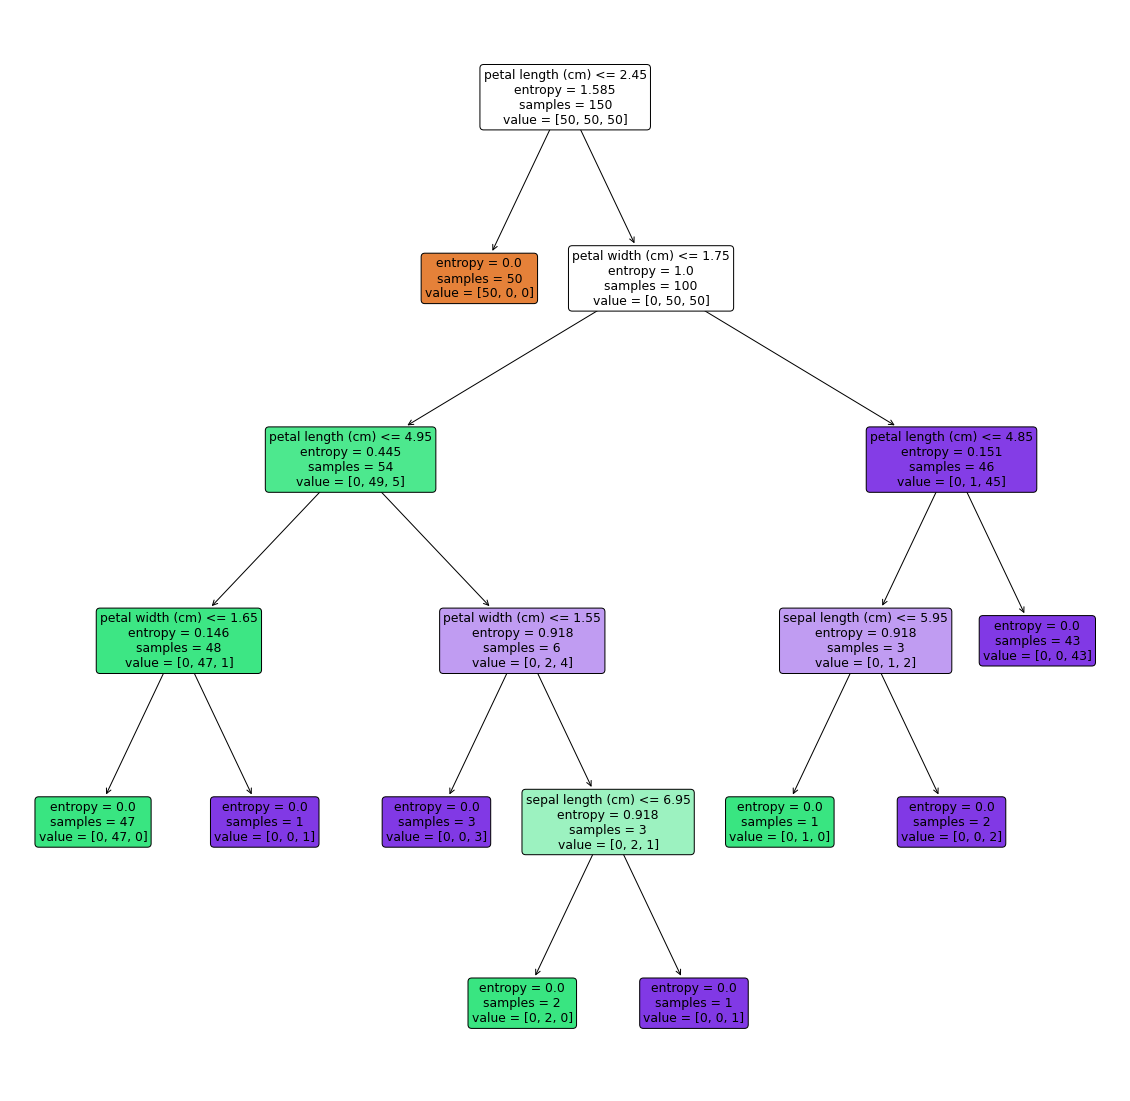

In [31]:
plt.figure(figsize=(20,20))
plot_tree(model_iris, feature_names=X_iris.columns, filled=True, rounded=True);

We can also display the tree as text, which can be easier to follow for deeper trees.

In [32]:
from sklearn.tree import export_text
tree_text = export_text(model_iris, feature_names=X_iris.columns.to_list())
print(tree_text)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



You can also plot using `graphviz` by running `conda install -c anaconda graphviz` followed by `conda install -c anaconda python-graphviz`. Graphviz is a graph visualization tools, working with `dot` data. Visit [Graphviz Documentation Page](https://www.graphviz.org) for more information.

```
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    decision_tree=dtc_iris,
    out_file=None,
    feature_names=X_iris.columns,
    class_names=y_label,
    filled=True,
    rounded=True) 
graph = graphviz.Source(dot_data)
graph
```

If you want to export your tree into images or pdf, you can use Graphviz render:

```
graph.format = "png" # or "pdf"
graph.render("result/decision_tree")
```

Notice how our decision tree is useful because it produces rules that are are easy to interpret even for non-technical professionals. A reasonable decision tree model can be useful for field workers tasked to categorize type of flowers because they need only to remember one or two simple rules. 

How does a decision tree chooses which feature among the datasets to split on? In the earlier example, how does it pick Petal Length over Petal Width as its first splitting criterion?

Simplistically, we can imagine that the tree will choose to split the data in such a way that the resulting nodes will contain datapoints that contains as high proportion of a single class as possible. The degree to which this is possible is measured as "purity" and various decision tree implementations use a similar standard to achieve splits that ultimately increase homogeneity within the groups.

In [33]:
import pandas as pd

# split at root node
pd.crosstab(
    index=X_iris['petal length (cm)'] <= 2.45,
    columns=y_iris.apply(lambda x: y_label[x])
)

target,setosa,versicolor,virginica
petal length (cm),,,
False,0,50,50
True,50,0,0


## [Optional] Entropy and Information Gain
The first thing to consider in decision tree is how you split your tree. There are mainly two criterion of impurity measurement to split a tree; **Gini Index** and **Information Gain**. There's not so many differences since it's often used interchangeably.

### Gini Index
Gini index or also called gini impurity have the goals to measure how often a randomly chosen element from the set would be incorrectly labeled. 

$$
    Gini(S) = 1 - \sum^{c}_{i=1} (p_i)^2
$$

- $S$: segment of data
- $c$: number of class levels
- $p_i$: proportion of class $i$

Let's assume $c$ consists of two classes: {Positive, Negative}

**Case 1**:

In our data, the occurence of Positive is 100 and Negative is 0. Then gini result would be $1-(1+0) = 0$. The zero value of Gini impurity means the data is homogenous, and we will never incorrectly labeled Positive as Negative. 

**Case 2**:

In our data, the occurence of Positive is 50 and Negative is 50 Then gini result would be $1-(0.25+0.25) = 0.5$. This value of Gini impurity means the data is half pure.

### Information Gain
In information gain, we will use **Entropy** as a measure to split the tree. The intuition of Entropy is not so differs from Gini, but instead of using plain probability, it uses the log as well.

$$
    Entropy(S) = - \sum^{c}_{i=1} p_i\ log_{2}(p_i)
$$

- $S$: segment of data
- $c$: number of class levels
- $p_i$: proportion of class $i$

Suppose we have a segment of data with 50% Positive and 50% Negative, the entropy is:

In [34]:
import math

-0.5*math.log2(0.5) - 0.5*math.log2(0.5)

1.0

If the segment of data is 99% Positive and 1% Negative, the entropy is:

In [35]:
-0.99*math.log2(0.99) - 0.01*math.log2(0.01)

0.08079313589591118

So when our decision tree calculates the change in homogeneity resulting from a given split on each possible feature (known as **information gain**), it is calculating the difference between the entropy in the segment before ($S_1$) and after the split ($S_2$):

$$
    Information\ Gain(F) = Entropy(S_1) - Entropy(S_2)
$$

Post-split, our data is divided into more than one partition so the calculation or $S_2$ has to consider the **weighted sum of entropy** across all of the partitions. In other words, the total entropy for $S_2$ is the sum of the entropy of each of the partitions weighted by their proportion of examples in that partition.

When dealing with numeric features, most decision tree classifications will test various splits by setting a numeric threshold and hence converting our numbers to a two-level categorical feature and allowing our information gain formula to work as usual.

> **Notes:** As you noticed, there's not much difference from both measurement. However, Entropy can cost more computational processes compared to Gini since it uses logarithmic function. By default, `sklearn` use Gini to split the tree.

# Machine Learning Workflow: Decision Tree

## Problem Statement

Let's start by reading our dataset in, a sample data of mudstone data. It contains 6030 entries with each entry consists of log measurements, 2 indicator variables, and measurement of depth, for mudstone wells in the Hugoton field of southwest Kansas. The data was originally published by Jie Chen in 2018

## Study Case: Credit Risk Analysis

We will return to using the `loan_selected` object that we created earlier, and we will try to compare the metrics obtained using the decision tree model.

In [36]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1244, 13)
(1244,)
(312, 13)
(312,)


## Model Fitting: Decision Tree

Let's us fit our training data to `DecisionTreeClassifier` with entropy splitting criterion and depth of 5.

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Membuat Model 
dt_loan = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

# Train Model 
dt_loan.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

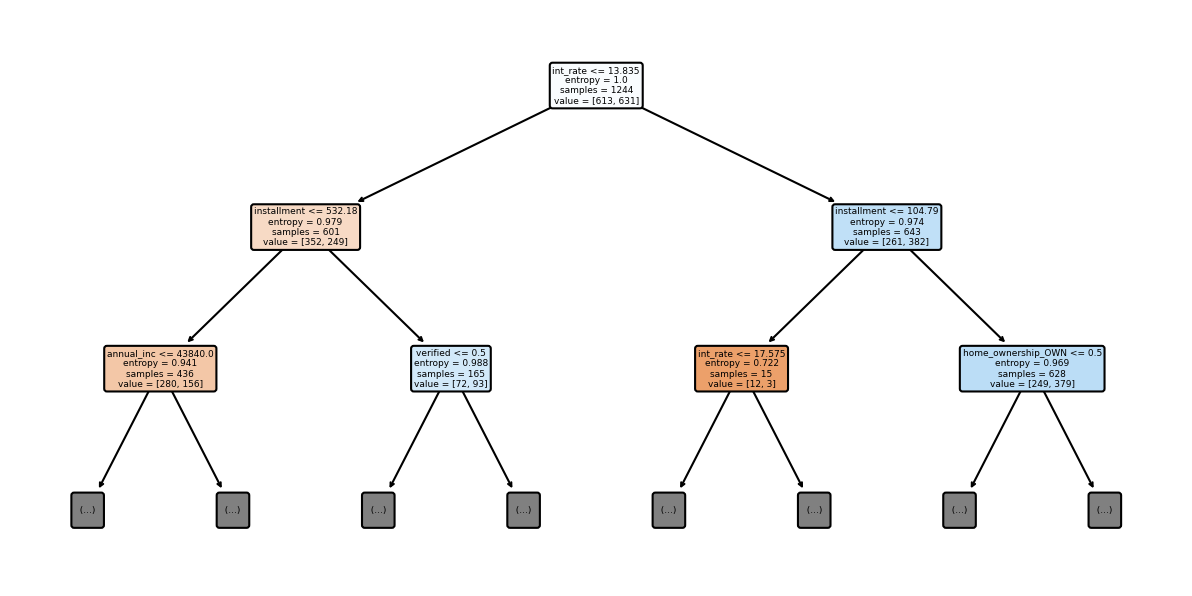

In [38]:
plt.figure(figsize=(10,5), dpi=150)
plot_tree(dt_loan,
          feature_names=x_train.columns,
          max_depth=2,
          filled=True,
          rounded=True);

## Model Prediction

Method `.predict()` allows us to predict the label of a new set of data, given a trained (fitted) model. This method accepts only one argument (the new data) and returns the learned label for each object in the array.

In [39]:
y_pred_dt = dt_loan.predict(x_test)
y_pred_dt # dibnadingkan dengan y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

For classification problems, some estimators also provide `.predict_proba()` method, which returns the **probability** that a new observation has each categorical label. In this case, the label with the highest probability is returned by `.predict()` method. For binary classification, if the predicted probability is >= 0.5, then the observation is classified as a Positive class, otherwise Negative.

Note: In decision tree model, the predicted probability is represented by the class proportion on the leaf nodes.

In [40]:
y_pred_prob_dt = dt_loan.predict_proba(x_test)
y_pred_prob_dt[:, 1]

array([0.63186813, 0.63186813, 0.63186813, 1.        , 0.24705882,
       0.33333333, 0.63186813, 0.63186813, 0.3681592 , 0.3681592 ,
       0.3681592 , 0.3681592 , 0.16666667, 0.49305556, 0.63186813,
       0.3681592 , 0.24705882, 0.3681592 , 0.5       , 1.        ,
       0.63186813, 1.        , 0.63186813, 0.3681592 , 0.24705882,
       1.        , 1.        , 0.63186813, 0.35714286, 0.63186813,
       0.49305556, 0.3681592 , 0.3681592 , 0.49305556, 1.        ,
       0.3681592 , 0.49305556, 0.3681592 , 0.3681592 , 0.63186813,
       0.49305556, 0.3681592 , 0.63186813, 1.        , 0.63186813,
       0.3681592 , 0.69230769, 0.63186813, 0.2       , 0.63186813,
       0.        , 0.38888889, 0.55555556, 0.63186813, 0.24705882,
       1.        , 0.63186813, 0.24705882, 0.65714286, 1.        ,
       0.38888889, 0.35714286, 0.63186813, 0.63186813, 0.3681592 ,
       0.65714286, 0.63186813, 0.3681592 , 0.49305556, 0.        ,
       0.5       , 0.72      , 0.63186813, 0.24705882, 0.     

In [41]:
(y_pred_prob_dt[:,1] > 0.40).astype(int)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

## Model Evaluation (Accuracy)

All fitted estimators in `sklearn` implement a `.score()` method. This score ranges between 0 and 1, with a larger score indicating a better fit. In classification problems, it is equivalent to an accuracy score. Accuracy is the proportion of correctly identified cases from all cases. It is a common practice to compare the performance of a model on training as well as on testing data.

In [42]:
# train accuracy
log_train_acc
dt_train_acc = dt_loan.score(x_train, y_train)
dt_train_acc

0.6985530546623794

In [43]:
# test accuracy
dt_test_acc = dt_loan.score(x_test, y_test)
dt_test_acc

0.5833333333333334

We have our initial Decision Tree model with a 60% accuracy on both training and testing data. This does not tells us whether the model specification is optimal, so try and pause here and ask - what are some things we can try in obtaining a better model performance? Think of some strategy and list them down before scrolling further:

> The importance to evaluate your model in light of the question, "can my model be further improved upon?"

# Modeling Improvement

In this section, we would like to address some of the problems we faced before:

- In terms of metrics selection, accuracy is a misleading metric to be used on imbalanced data. The solution is to use more representative metric.
- In terms of imbalanced data, we can apply several techniques to make sure the class proportion is somewhat balanced.
- In terms of overfitting, we can search for a sub-optimal hyperparameters to improve the model performance on train and test data.

In [44]:
print(classification_report(
    y_true=y_test,
    y_pred=dt_loan.predict(x_test),
    digits=5))

              precision    recall  f1-score   support

           0    0.60606   0.60606   0.60606       165
           1    0.55782   0.55782   0.55782       147

    accuracy                        0.58333       312
   macro avg    0.58194   0.58194   0.58194       312
weighted avg    0.58333   0.58333   0.58333       312



## Pruning and Tree Size

After solving the split problem, the decision tree has one other problem to solve: it needs to know when to stop growing. If the tree grow indefinitely (and it can) it will end up splitting all data points until they are perfectly classified and yield an overly specific model (overfitting; or the case of high variance and low bias).

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. In tree-based model, the regularization often called as **pruning**.

One approach is to set a pre-determined number of levels upon which we command our tree to stop growing. This is an approach known as **pre-pruning**, but it has the obvious downside of us having to make an informed guess around the optimal depth / size of the tree.

The alternative, **post-pruning** relies on a strategy that grow the tree to too large a size and then pruning it later on once all important structures and classification patterns were discovered. Getting the best fit decision tree model means we manage to strike a good balance with our bias-variance and precision-recall tradeoffs. Reference: [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

Documentation of [`sklearn` `DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

> Rule-of-thumb: Increasing `min_*` or decreasing `max_*` hyperparameters will result in simpler tree model.

In [45]:
model_dt_pruning = DecisionTreeClassifier(
    max_depth=40, # Maximum Kedalaman Tree 
    min_samples_split=10,
    min_samples_leaf=5,
    max_leaf_nodes=None,
    max_features='auto',
    random_state=123)
model_dt_pruning.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=123)

In [46]:
# training performance
print(classification_report(
    y_true=y_train,
    y_pred=model_dt_pruning.predict(x_train),
    digits=5))

# testing performance
print(classification_report(
    y_true=y_test,
    y_pred=model_dt_pruning.predict(x_test),
    digits=5))

              precision    recall  f1-score   support

           0    0.67954   0.77488   0.72409       613
           1    0.74679   0.64501   0.69218       631

    accuracy                        0.70900      1244
   macro avg    0.71317   0.70994   0.70813      1244
weighted avg    0.71365   0.70900   0.70790      1244

              precision    recall  f1-score   support

           0    0.57923   0.64242   0.60920       165
           1    0.54264   0.47619   0.50725       147

    accuracy                        0.56410       312
   macro avg    0.56094   0.55931   0.55822       312
weighted avg    0.56199   0.56410   0.56116       312



From the classification_report that we get above, it can be concluded that there is no significant difference in the values of the train and test data. So that the model that we make is not overfitting.

# Ensemble Methods
Ensemble method is a learning method that combines predictions from several machine learning models into 1 single prediction. The idea of ensembling is largely in principle and doesn't necessarily reference any particular algorithm. They describe any meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance, reduce bias, or improve predictions.

## Wisdom of the Crowd

Wisdom of the Crowd is the collective knowledge of a group of people as expressed through their aggregated actions or opinions, regarded as an alternative to specialist or expert knowledge.

**OPTIONAL: Mathematical Point-of-View**

Suppose we create 3 different machine learning models to make a single prediction of whether a customer is classified as default or not. Obtained the following performance:

1. Logistic Regression: 70% correct
2. k-Nearest Neighbor: 70% correct
3. Decision Tree: 70% correct

In the case of classification, majority voting will be used to combine the predicted results. In this case, it means that at least 2 models are sufficient to be correct in order for them to be collectively correct.

In [47]:
# probability all three models are correct = 0.7 * 0.7 * 0.7

# probability of at least two models being correct and one model wrong
# three combinations of correct models: 1&2, 1&3, 2&3
# 3 * 0.7 * 0.7 * (1 - 0.7)

0.7 * 0.7 * 0.7 + 3 * 0.7 * 0.7 * (1 - 0.7)

0.7839999999999999

It turns out that the model performance is **collectively** better than each model. This idea underlies the concept of the ensemble method.

## Types of Ensemble Methods

### Bagging
Stands for Bootstrap Aggregating. Bootstrapping is resampling data with the same cardinality from the dataset, that could help reducing the model's variance. How bootstrapping could reduce the variance? Well, by splitting our data into several small samples and feed them into homogenous classifier, we would likely to create less-overfitted models. With less overfit means, is, a lower variance.

This method is effective if you're working with limited data, since the resample methods allows you to estimeate the score by aggregating them (the classifiers's result). 

### Boosting
The main idea of boosting is to make a "teamwork" between models. Unlike Bagging where each model runs independently and then aggregated at the end, Boosting will add the models **sequentially**, one after another. A new base-learner model will be trained from the error of previous model, hence it will boost the knowledge of the whole model gradually. 

### Stacking
The previous two ensemble methods, bagging and boosting uses the same model learner. If it's decision tree, then all the learner are decision tree. Unlike both of them, stacking usually uses **different learner** to train. The other difference is stacking creates a meta-model as it's final model to predict the output. Unlike bagging where each models generates outputs, and then followed by aggregating the output (usually by average), stacking will create a **meta-model** (usually a neural network) on the last process to model the output of model learner (some people call it base learner).

# Random Forest
## Concept
Random forest is an example of bagging method. The **forest** means a bunch of decision trees (it's homogen). The **random** means there are several randomness in the model that makes this model can perform well. Two randomness of random forests are:

- Each tree is build from subsets of training sample through random sampling (with replacement)
- At each tree node, a subset of feature are randomly selected to generate the best split (rather than using all features)

In the case of classification, our forest then classify the new example through that voting mechanism while in the case of regression it simply takes the average of output.



Among many of its advantages, random forest can be used to solve for both regression and classification tasks, handles extremely large datasets well (since the ensemble approach means it only use a small sampled subset from the full dataset), would solve for the dimensionality problems through implicit feature selection while treating noisy data (missing values and outlier values) out of the box.

## Basic Implementation
Let's us fit our training data to `RandomForestClassifier` with default parameters. By default it uses 100 trees.

Using the same X_train and y_train data as before, we will use the random forest algorithm. Train the model using `RandomForestClassifier`. Here the parameter you can input to make training **easier** (tune for model speed):
- `random_state` : A definite value of random_state will always produce same results if given with same parameters and training data.
- `oob_score`: This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_rf_ori = RandomForestClassifier(random_state=14, oob_score=True) #out of box score
model_rf_ori.fit(x_train, y_train)

RandomForestClassifier(oob_score=True, random_state=14)

In [49]:
# train accuracy
rf_train_acc = model_rf_ori.score(x_train, y_train)
rf_train_acc

0.9991961414790996

The accuracy we get on the train data is 100% meaning, the model we make can guess all targets correctly.

In [50]:
model_log = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': [log_train_acc, dt_train_acc, rf_train_acc]
})
model_log

,Algorithm,Train Accuracy
0,Logistic Regression,0.551282
1,Decision Tree,0.698553
2,Random Forest,0.999196


Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. 

### Feature Importances
We can inspect `feature_importances_` attribute from the fitted random forest to get a list of the most important variables used in the model. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature across `n_estimators` trees. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See `sklearn.inspection.permutation_importance` as an alternative.

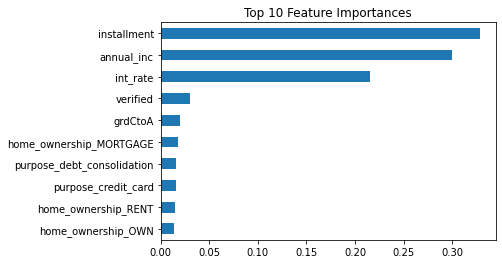

In [51]:
pd.Series(
    model_rf_ori.feature_importances_,
    index=x_train.columns
    ).sort_values().tail(10).plot.barh(title="Top 10 Feature Importances");

## Model Improvement

### Dive Deeper: Model Improvement
In the previous section, you have tried to make improvements in Decision Tree model using Grid Search or Random Search technique. Using the same approach, try to refine your Random Forest model with the following conditions:

- Use original data, over sampling, or down sampling data for model fitting
- Use `RandomForestClassifier(n_estimators=10, random_state=14)` 

In [52]:
# your code here


# use cross_val_score() if you only want to return test_score


[Fernández-Delgado, M. et. al, Do we Need Hundreds of Classifiers to Solve Real World Classification Problems?](http://jmlr.org/papers/v15/delgado14a.html)

A random forest is a high-performance algorithm and is a regular feature in many machine learning competitions. Empirically, many researchers have studied the performance of random forest compared to other classification algorithms and came to the following conclusion :  

> We evaluate 179 classifiers arising from 17 families (Bayesian, neural networks, support vector machines, decision trees, rule-based classifiers, boosting, bagging, random forests and other ensembles, generalized linear models, nearest-neighbors, partial least squares and principal component regression, logistic and multinomial regression, and other methods), implemented in Weka, R (with and without the caret package), C and Matlab, including all the relevant classifiers available today. We use 121 data sets, which represent the whole UCI data base (excluding the large-scale problems) and other own real problems, in order to achieve significant conclusions about the classifier behavior, not dependent on the data set collection. The classifiers most likely to be the bests are the random forest (RF) versions, the best of which (implemented in R and accessed via caret) achieves 94.1% of the maximum accuracy overcoming 90% in the 84.3% of the data sets ... The random forest is clearly the best family of classifiers (3 out of 5 bests classifiers are RF), followed by SVM (4 classifiers in the top-10), neural networks and boosting ensembles (5 and 3 members in the top-20, respectively). 

# Classification Workflow

A typical workflow of a machine learning task usually starts from the data wrangling, since the data we have got initially often cannot be directly used. That is so-called the raw data. The typical workflow is usually as follows:

1. Problem Statement
2. Read Data
3. Data Wrangling
4. Data Exploration
5. Feature Scaling
6. Train-Test Splitting
7. Model Fitting
8. Model Prediction
9. Model Evaluation
10. Model Improvement
11. Conclusion

Please be noticed that the workflow might not be linear. For example, sometimes the performance of the model is not quite well after we have done the model evaluation, and we still have other ideas to try. 

# Annotations
1. [Scikit Learn, Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [Scikit Learn, Decission Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
3. [Scikit Learn, Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

___